In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/jkrieger/work/ray_tracing/python')
import mantaray

In [2]:
g = 9.8
def period2wavenumber(T):
    k = (2*np.pi)**2/g/T**2
    return k

def group_velocity(k):
    cg = 0.5*(g/k)**.5
    return cg

In [3]:
# Period of incident waves in seconds
T0 = 11
# Direction of incident waves in radians (trig convention, going to)
theta0 = 0
# Convert period to wavenumber magnitude
k0 = period2wavenumber(T0)
# Calculate wavenumber components
kx0 = k0*np.cos(theta0)
ky0 = k0*np.sin(theta0)

# Number of rays
n_rays = 100
# Initialize wavenumber for all rays
Kx0 = kx0*np.ones(n_rays)
Ky0 = ky0*np.ones(n_rays)

# Current and bathymetry file path
current = 'data/currents/constant_vertical_gradient.nc'
bathymetry = 'data/bathymetry/bathy_zonal_jet.nc'

ds = xr.open_dataset(current)

x = ds.x.values
y = ds.y.values

# Creates initial x position for all rays
x0 = 10*np.ones(n_rays)
y0 = np.linspace(0, y.max(), n_rays)

# Estimates CFL
# Computes grid smallest spacing
dd = np.min([np.diff(x).mean(), np.diff(y).mean()])
# Computes group velocity
cg = group_velocity(k0)
# Computes CFL
cfl = dd/cg

duration = round(x.max()/cg)
step_size = cfl

In [4]:
bundle = mantaray.ray_tracing(x0, y0, Kx0, Ky0, duration, step_size, bathymetry, current)

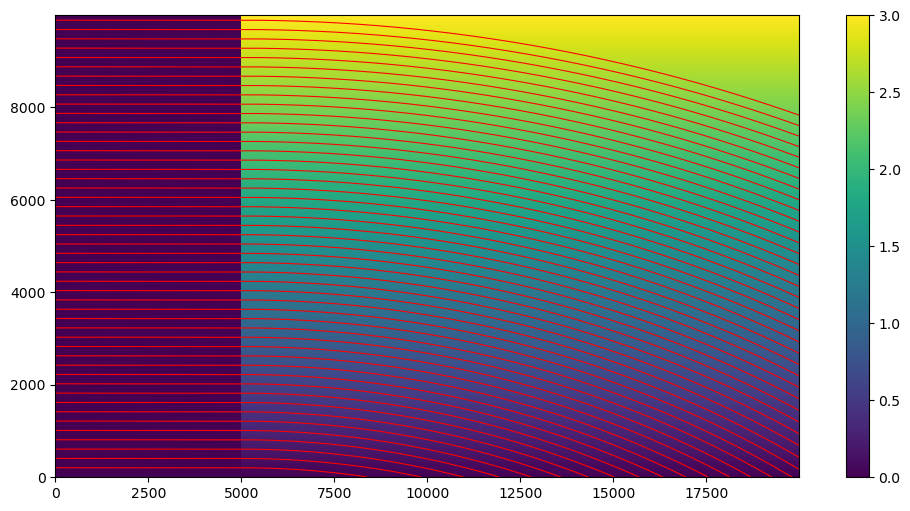

In [5]:
X = ds.x
Y = ds.y
U = (ds.u**2 + ds.v**2)**.5
plt.figure(figsize=(12, 6))
cs = plt.pcolormesh(X, Y, U)
for i in range(bundle.ray.size)[::2]:
    ray = bundle.isel(ray=i)
    plt.plot(ray.x, ray.y, 'red', lw=.78)
plt.colorbar(cs)